# Video: Low Rank Approximations of Every Dataset in This Course

This video estimates the rank of good low rank approximations for every dataset in this course using principal components analysis.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA

Script:
* In this video, I will look at the different data sets used in this course to estimate the rank of a good low rank approximation.
* We will start with the abalone data set.

In [ ]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/abalone.tsv", sep="\t")
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Script:
* The abalone data set has one non-numeric column, sex, so we will ignore it for this analysis.

In [ ]:
abalone = abalone.drop("Sex", axis=1)

In [ ]:
abalone_pca = PCA()
abalone_pca.fit(abalone)

PCA()

Script:
* The scikit-learn implementation of PCA stores the explained variance for each component, so we can inspect that to estimate the rank for a low rank approximation.
* If we did not have that, we could compute it ourselves by taking by multiplying raw data by the matrix of principal components to get the coordinates, and then taking the variance of each column.

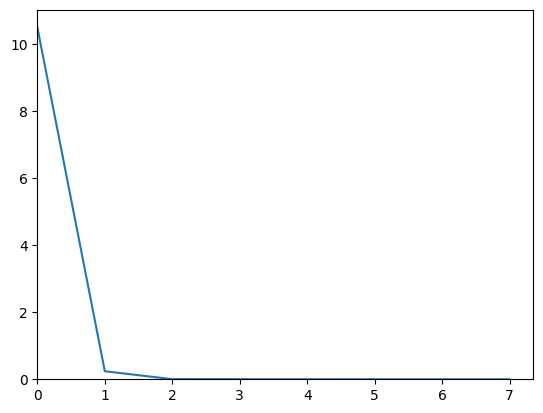

In [ ]:
plt.plot(abalone_pca.explained_variance_)
plt.gca().set_xlim(0)
plt.gca().set_ylim(0)
None

Script:
* Nearly all the variance is explained by the first principal component, and most of the rest is explained by the second principal component.
* The rest of the explained variance curve is barely distinct from the x axis.
* In this case, a rank two approximation of this data set using the first two principal components will explain essentially all of the variance of the data set.
* Even just a rank one approximate would be pretty good.
* Bear in mind that this is largely because the variance of the rings column of this data set is far than that of the other columns.

In [ ]:
abalone.var(numeric_only=True)

,0
Length,0.014422
Diameter,0.009849
Height,0.001750
Whole_weight,0.240481
Shucked_weight,0.049268
Viscera_weight,0.012015
Shell_weight,0.019377
Rings,10.395266


Script:
* For the rest of the data sets, I will write a function to chart their explained variance quickly.

In [ ]:
def plot_pca_variance(*data_locations, sep="\t"):
    df = pd.concat(pd.read_csv(d_l, sep=sep) for d_l in data_locations)

    numeric_columns = [c for c in df.columns if df[c].dtype.name != 'object']
    df = df[numeric_columns]
    df = df.dropna()

    pca = PCA()
    pca.fit(df[numeric_columns].dropna())

    plt.plot(pca.explained_variance_)
    plt.gca().set_xlim(0)
    plt.gca().set_ylim(0)
    plt.title("PCA of Raw Numeric Data")
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance")


Script:
* Let's try that out on the tiny mangos data set.

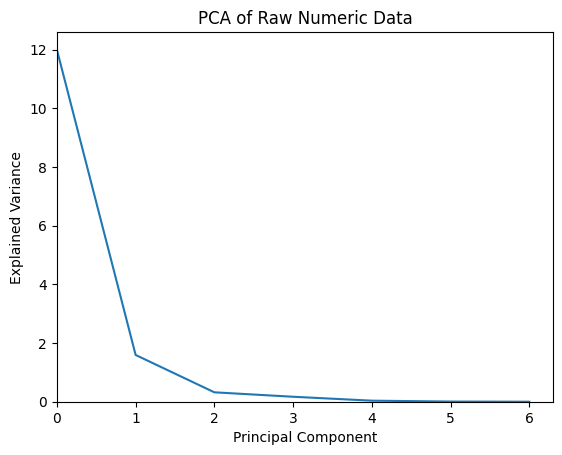

In [ ]:
plot_pca_variance("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/main/data/mango-tiny.tsv")

Script:
* The first two principal components have appreciable variance, but it drops of steeply for the third component.
* I would be comfortable with a rank 2 or 3 approximation of this data.
* The normalization does not sub

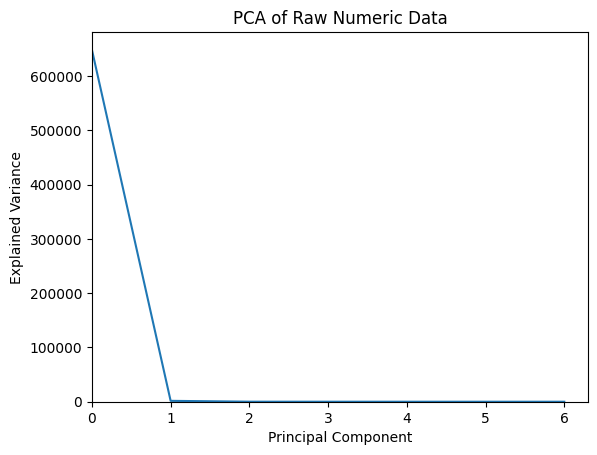

In [ ]:
plot_pca_variance("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", "https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", sep=",")

Script:
* The penguin data has a pretty good low rank approximation from just one principal component.
* Again, that is from one column having a much higher variance than the others.
* For the penguins, that column is body mass.
* Let's look at individual penguin species.
* Since the penguin species have different sizes, looking at one at a time will let us focus on differences within a species.
* I'll start with Adelie penguins.

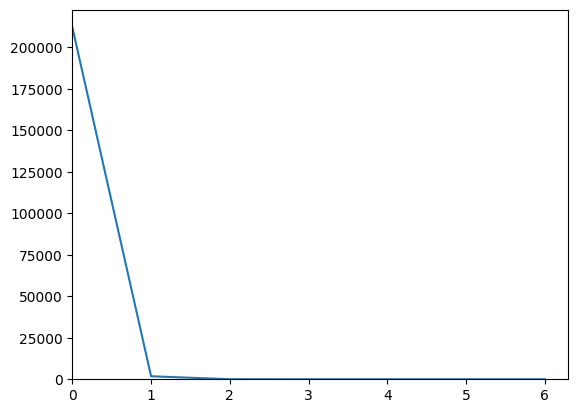

In [ ]:
plot_pca_variance("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", sep=",")

Script:
* Adelie penguins do see a smidgeon of variance explained by the second component.
* But a rank one approximation would still be pretty close.
* It's worth pointing out that the variance explained by the first component has shrunk compared to a third of the variance with all penguins.
* Combining different penguin species significantly increased the variance.
* Let's look at Chinstrap penguins next.

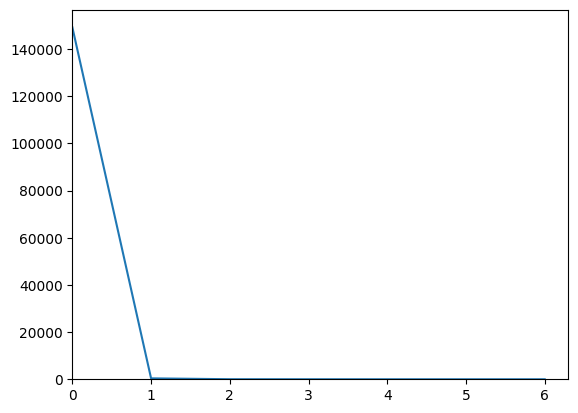

In [ ]:
plot_pca_variance("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", sep=",")

Script:
* The story is the same for Chinstrap penguins.

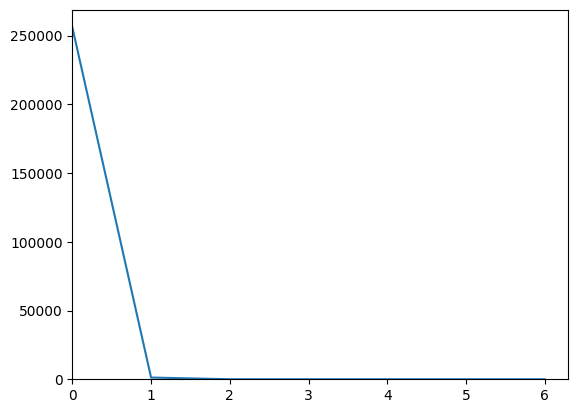

In [ ]:
plot_pca_variance("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", sep=",")

Script:
* And for Gentoo penguins.
* As a bonus, I will add one more data set.
* The red wine data set collected by the University of Minho that was used in mod 2.

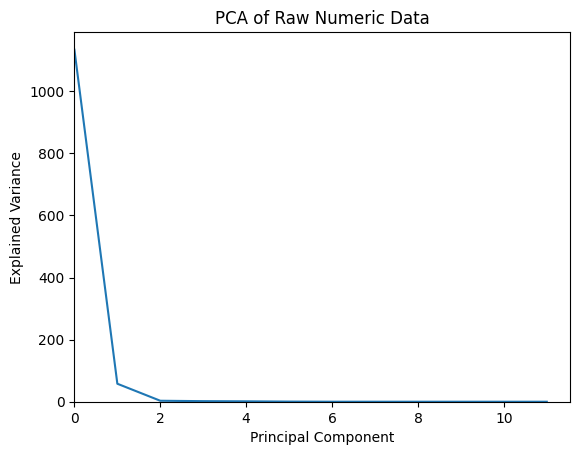

In [ ]:
plot_pca_variance("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz")

Script:
* The red wine data set has more columns, but the first two principal components still cover nearly all the variance.
* Wrapping up, these data sets that we have looked at are relatively small, but have had a surprising amount of variance covered in just one or two principal component or two.
* Usually that is driven by individual columns being much larger, and there is still important information in the other principal components.
* However, we will have to look more closely at the data to extract that information in a meaningful fashion.
